In [1]:
!unzip /content/drive/MyDrive/intel-img-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# New Section

In [2]:

import keras.layers as Layers
import keras.activations as Actications
import keras.models as Models
import keras.optimizers as Optimizer
import keras.metrics as Metrics
import keras.utils as Utils
from keras.utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [3]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0

    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=42) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

    return labels[class_code]

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
Images, Labels = get_images('/content/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [8]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


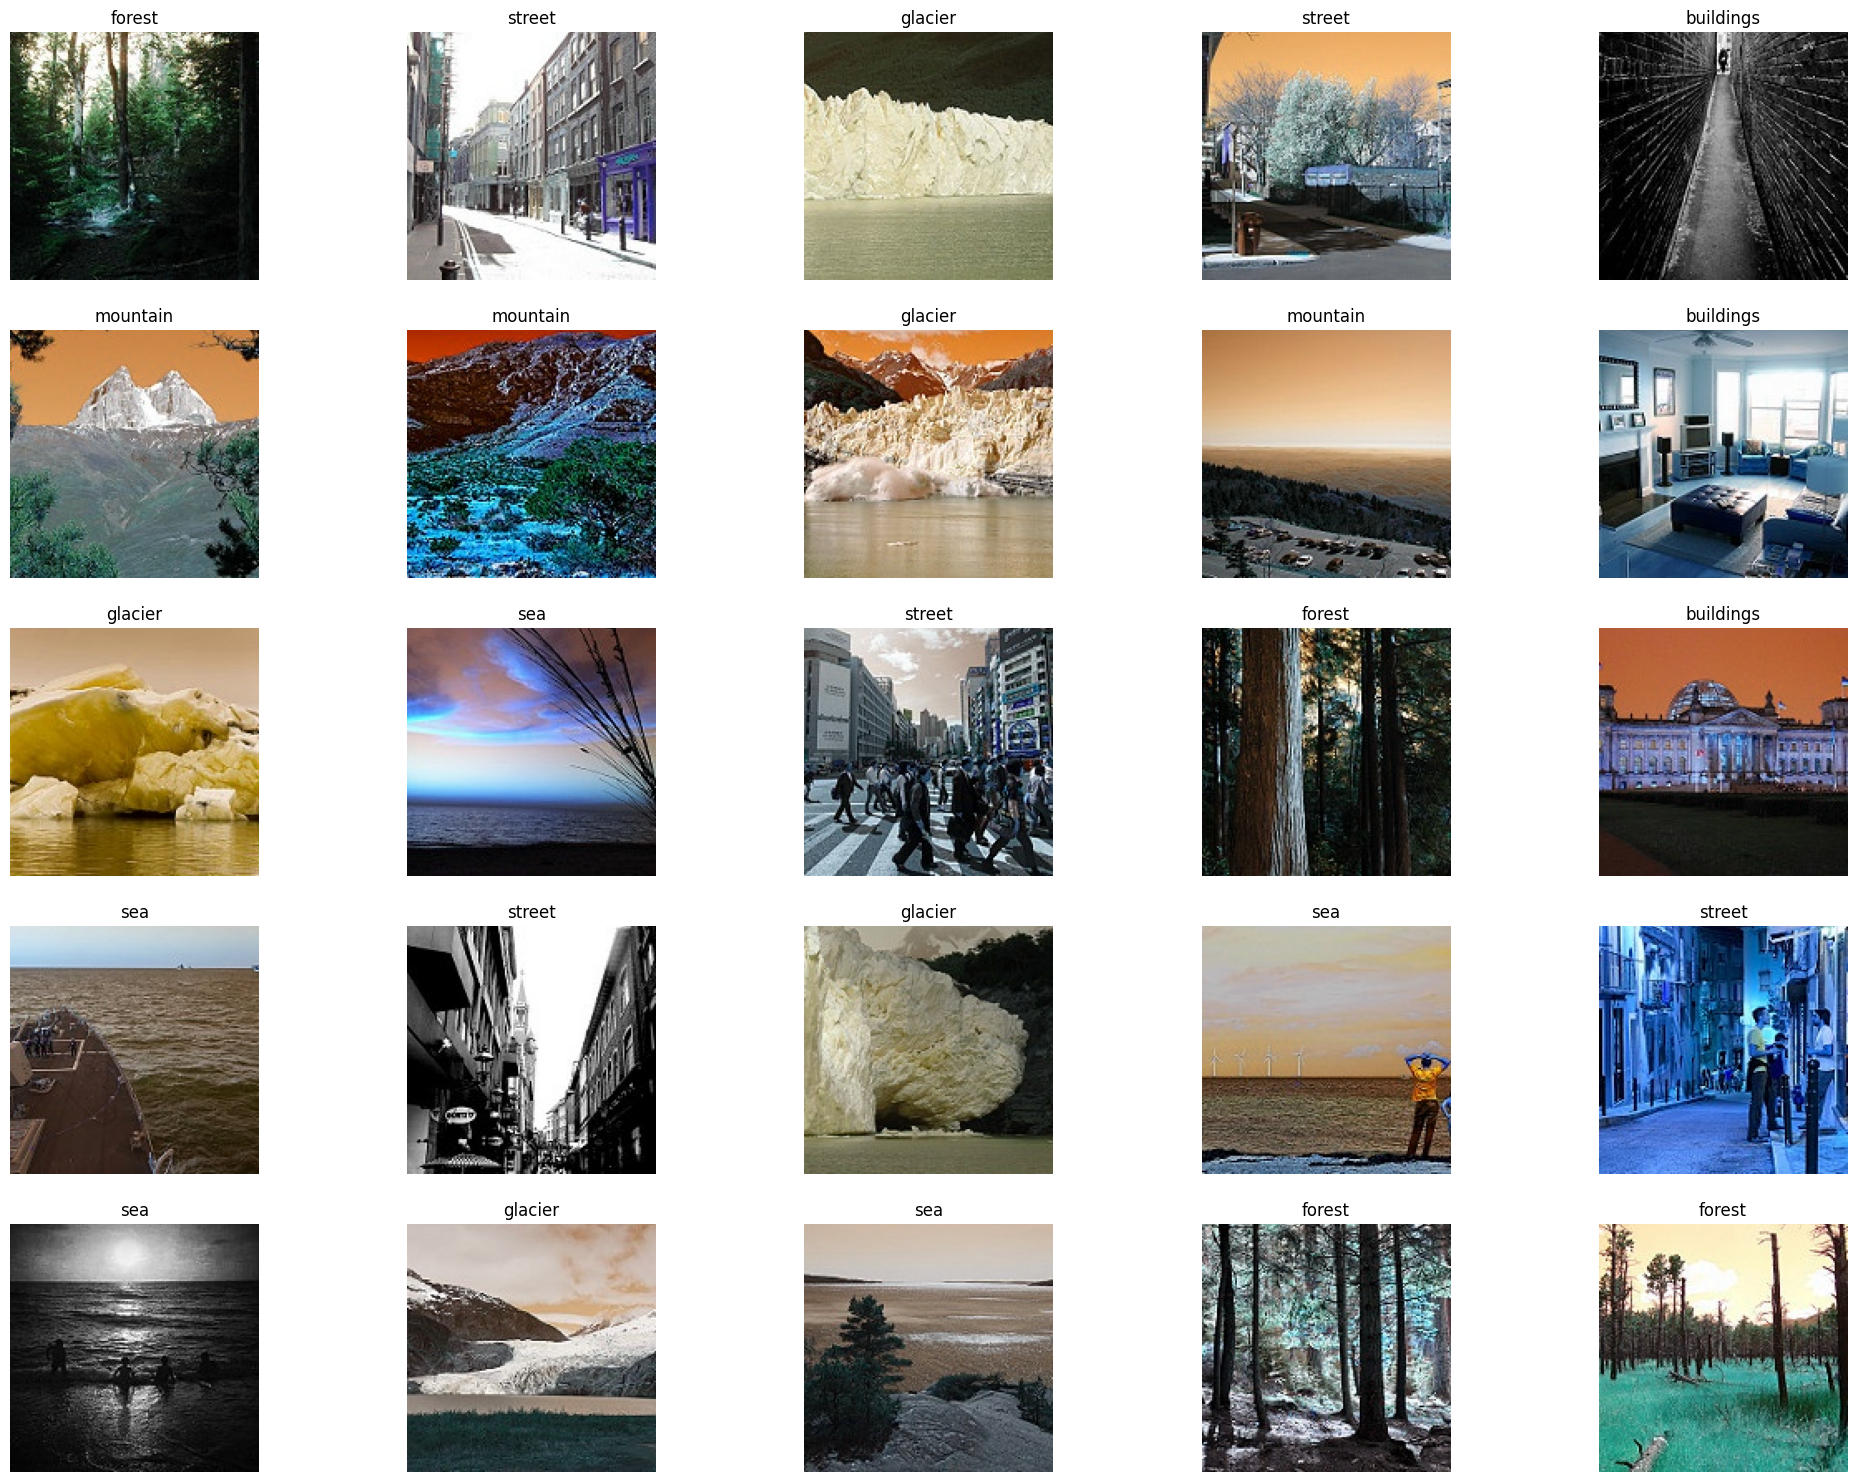

In [9]:
f,ax = plot.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 180)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

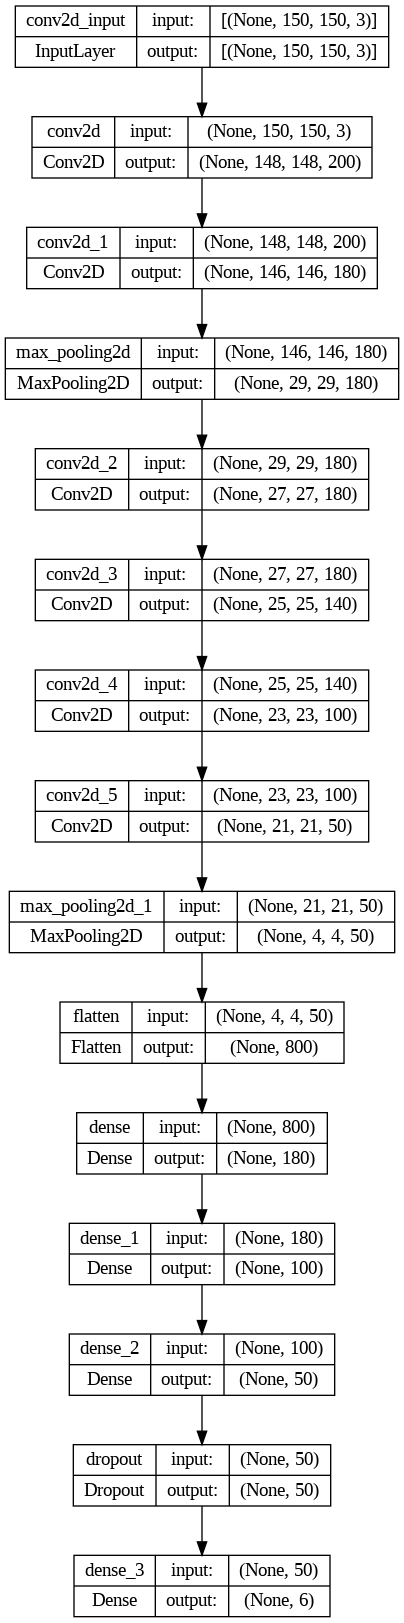

In [10]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [11]:
trained = model.fit(Images,Labels,epochs=20,validation_split=0.30)

Epoch 1/20
307/307 [==============================] - 127s 355ms/step - loss: 1.5569 - accuracy: 0.3768 - val_loss: 1.0790 - val_accuracy: 0.5517
Epoch 2/20
307/307 [==============================] - 99s 322ms/step - loss: 1.1196 - accuracy: 0.5611 - val_loss: 0.9722 - val_accuracy: 0.6008
Epoch 3/20
307/307 [==============================] - 97s 316ms/step - loss: 0.9916 - accuracy: 0.6064 - val_loss: 0.8290 - val_accuracy: 0.6682
Epoch 4/20
307/307 [==============================] - 97s 315ms/step - loss: 0.9029 - accuracy: 0.6579 - val_loss: 0.7660 - val_accuracy: 0.7093
Epoch 5/20
307/307 [==============================] - 98s 319ms/step - loss: 0.8603 - accuracy: 0.6781 - val_loss: 0.7497 - val_accuracy: 0.7298
Epoch 6/20
307/307 [==============================] - 98s 319ms/step - loss: 0.7752 - accuracy: 0.7206 - val_loss: 0.8060 - val_accuracy: 0.7036
Epoch 7/20
307/307 [==============================] - 96s 312ms/step - loss: 0.7344 - accuracy: 0.7379 - val_loss: 0.7168 - val_a

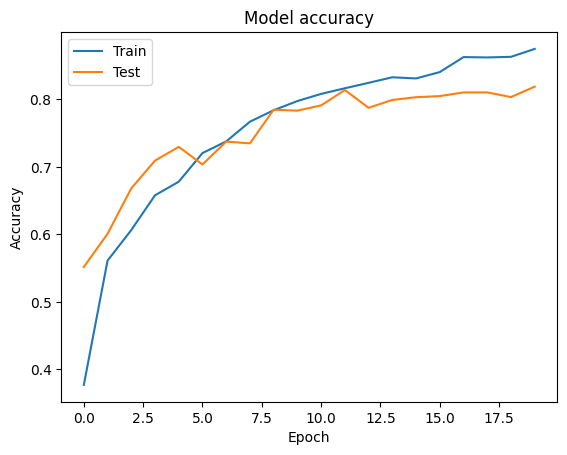

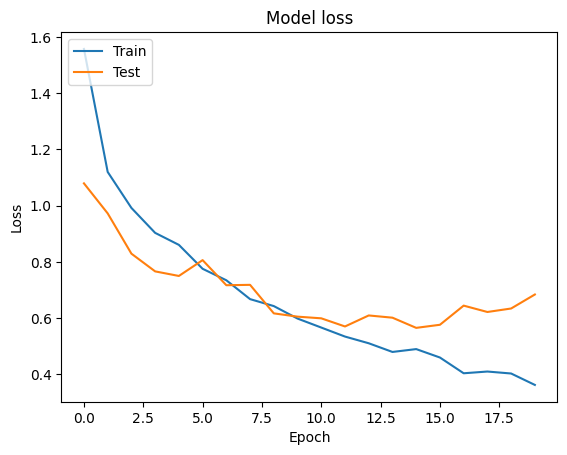

In [13]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [15]:
test_images,test_labels = get_images('/content/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 8s 86ms/step - loss: 0.6880 - accuracy: 0.8133


[0.6880372166633606, 0.8133333325386047]

In [17]:
pred_images,no_labels = get_images('/content/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

1/1 [==============================] - 0s 17ms/step


<ipython-input-20-cd2c30b03de7>:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


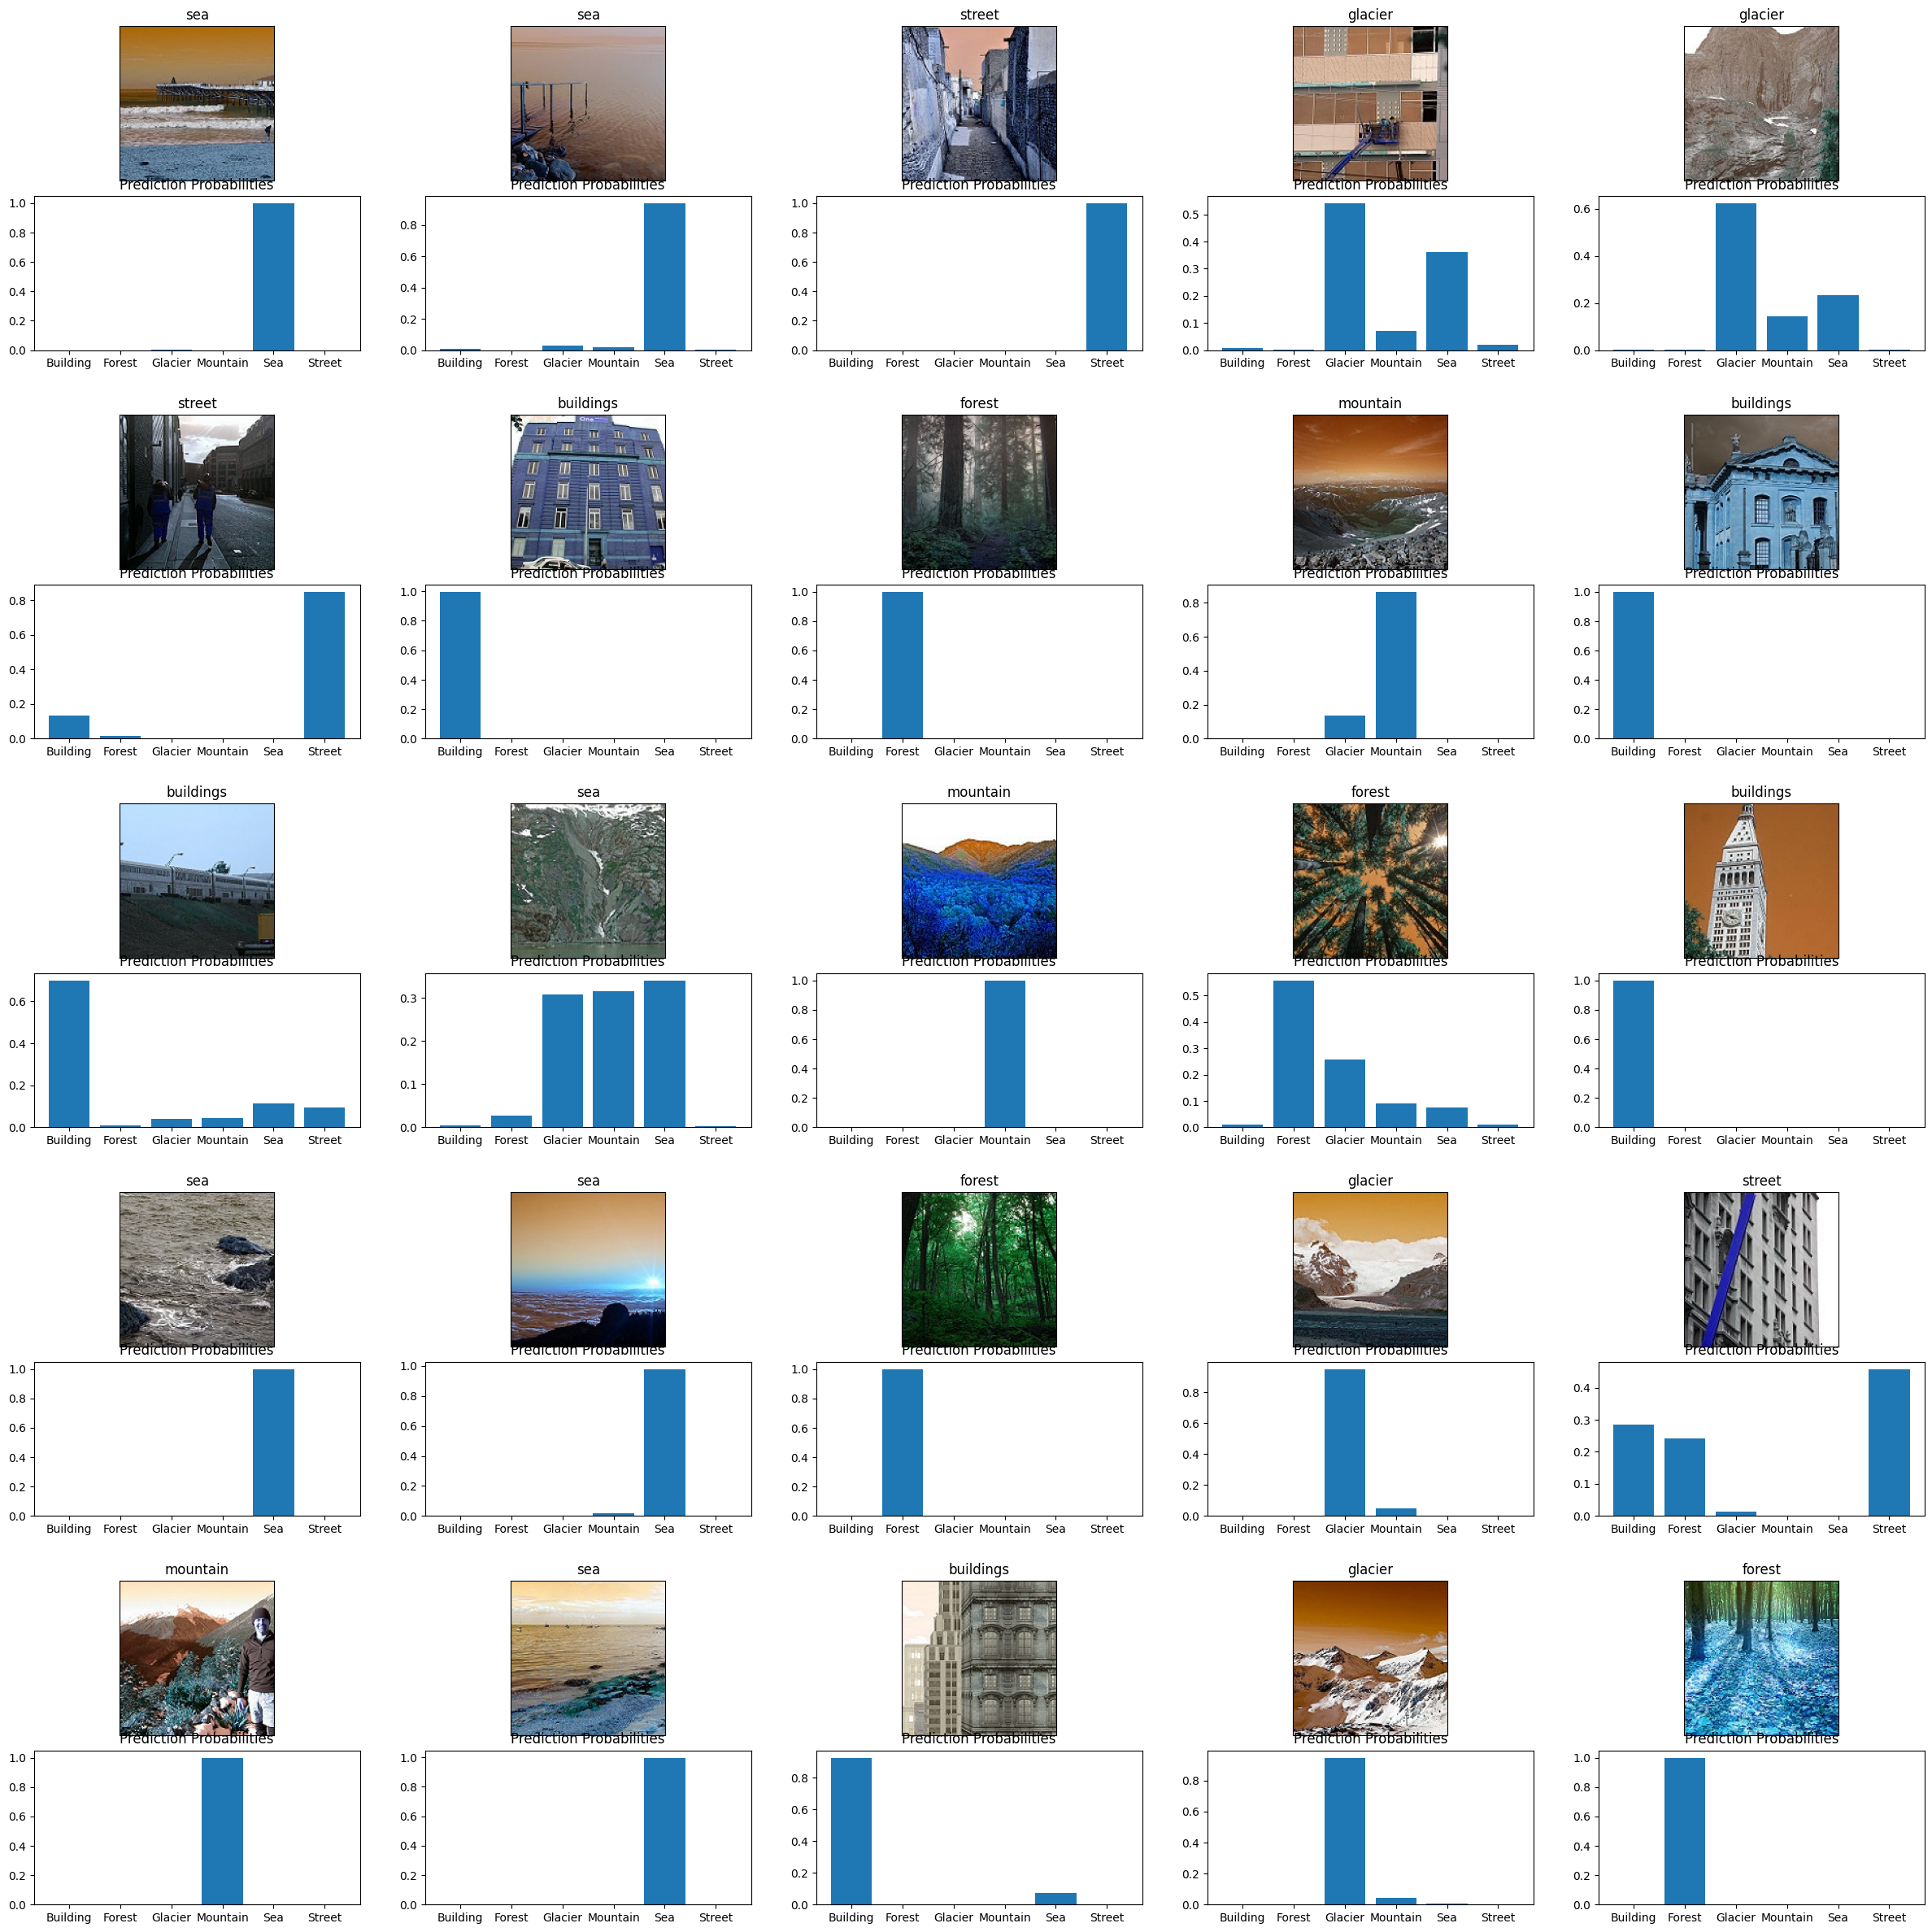

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from random import randint

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0, len(pred_images) - 1)
    pred_image = np.array([pred_images[rnd_number]])
    pred_prob = model.predict(pred_image).reshape(6)
    pred_class_index = np.argmax(pred_prob)
    pred_class = get_classlabel(pred_class_index)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.bar(np.arange(6), pred_prob)
            ax.set_xticks(np.arange(6))
            ax.set_xticklabels(['Building', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street'])
            ax.set_title('Prediction Probabilities')
        fig.add_subplot(ax)

fig.tight_layout()
plt.show()
